# Assignment 16 : K-Nearest Negighbours

## Objective :

To  Implement  and evaluate the K-Nearest Neighbours KNN algorithm for classification using the given dataset.

## Import Necessary libraries 

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Load the dataset

In [40]:
data = pd.read_csv("Zoo.csv")

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [42]:
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## Data description :
 - Data has total 18 features (columns).
 - It has 101 entries(records).
 - Having no null values.
 - categorical data is already treated.
 - The target variable is categorical in nature.

In [43]:
# checking for null values.
data.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [44]:
data.isna().sum().sum()

0

In [45]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


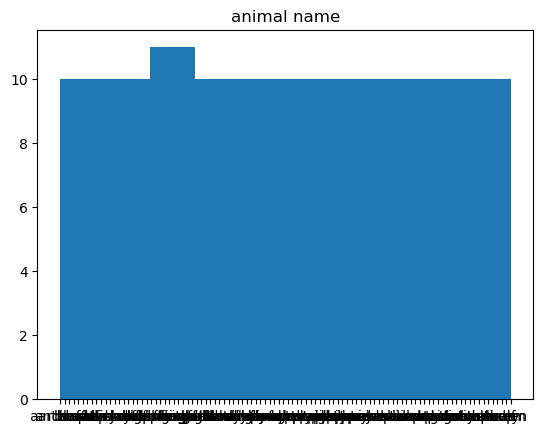

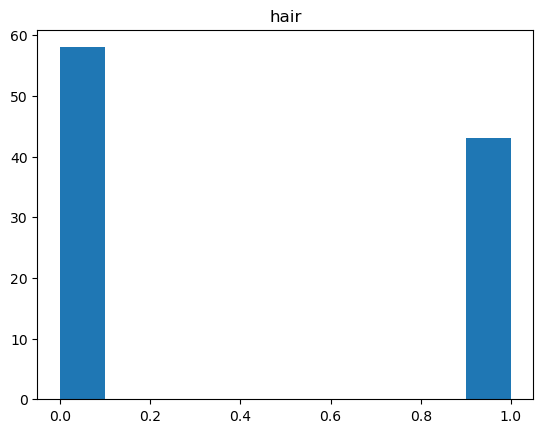

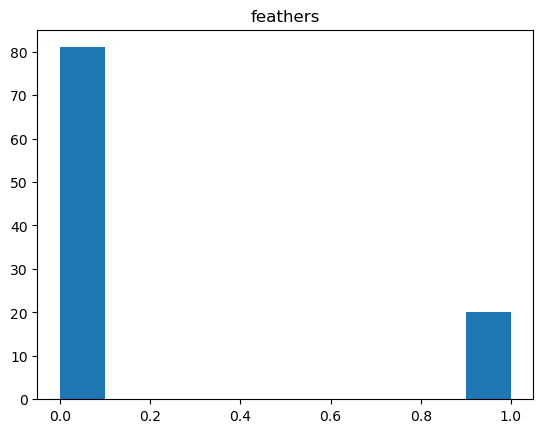

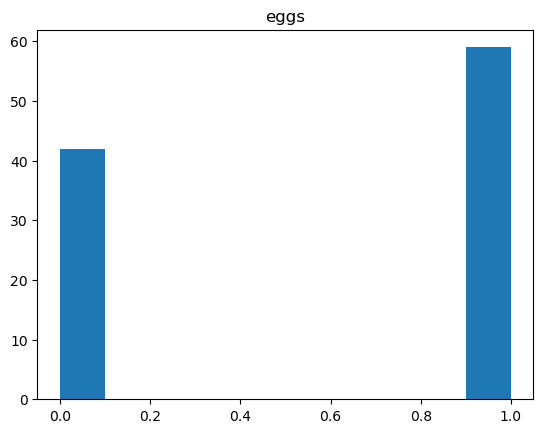

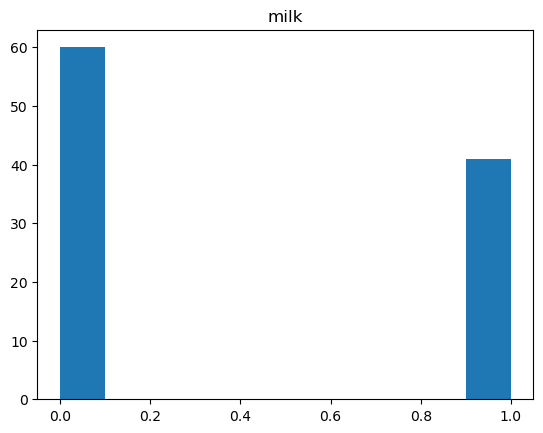

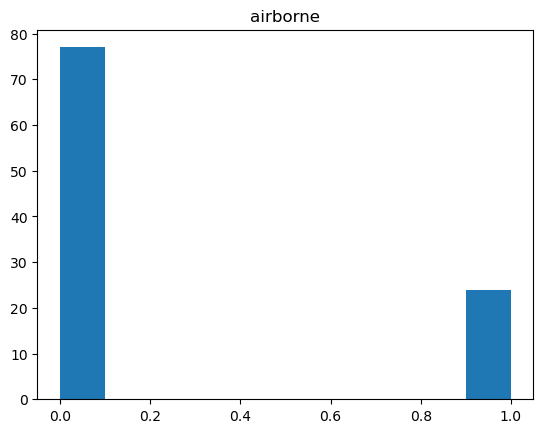

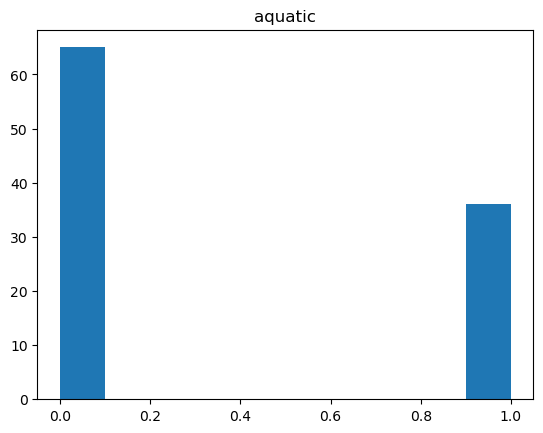

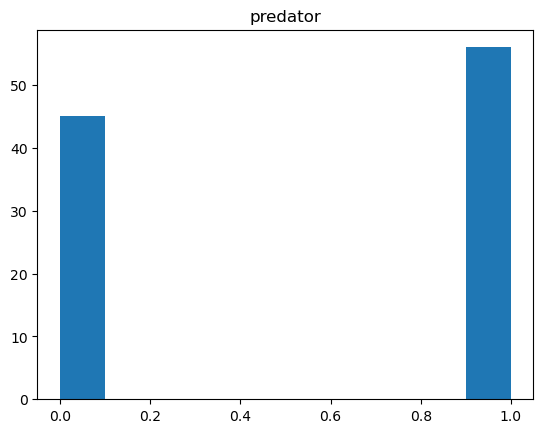

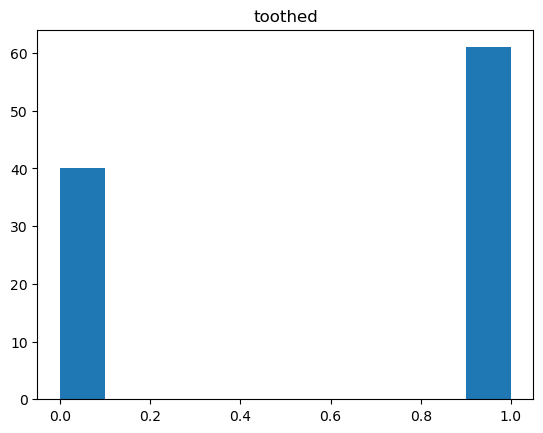

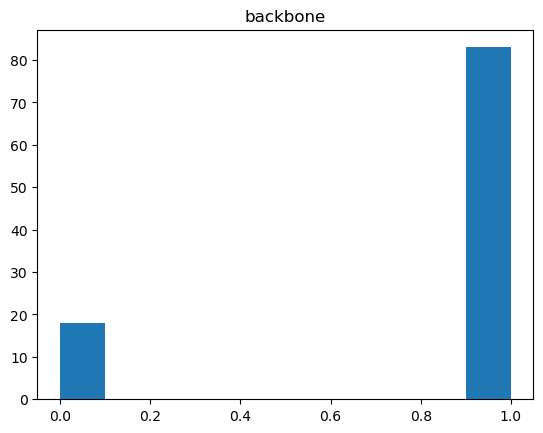

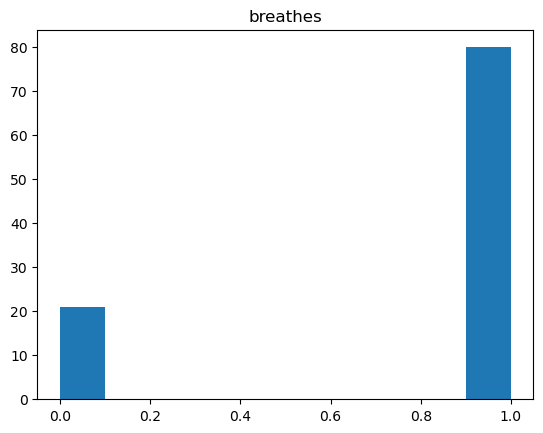

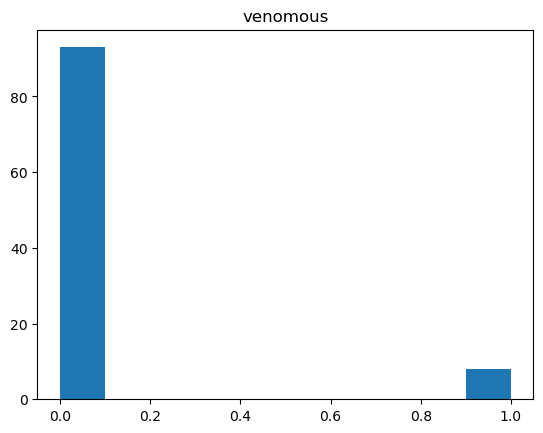

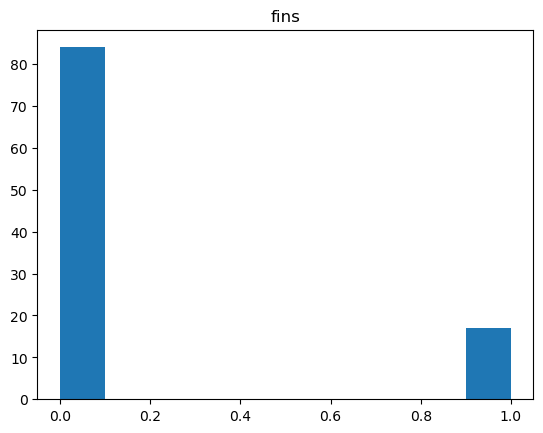

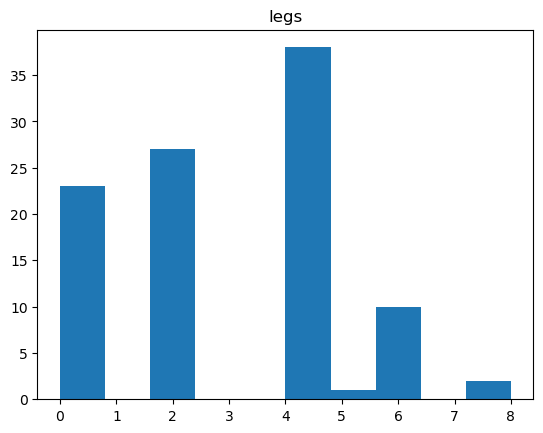

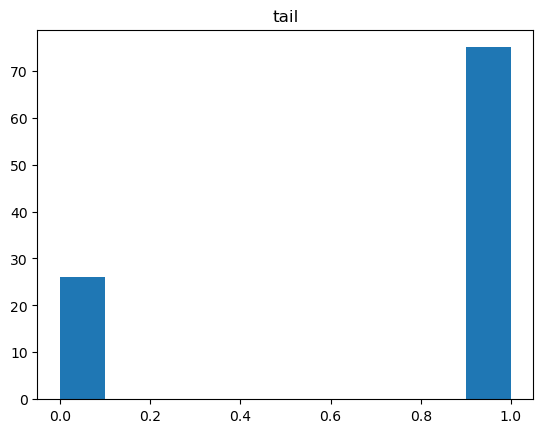

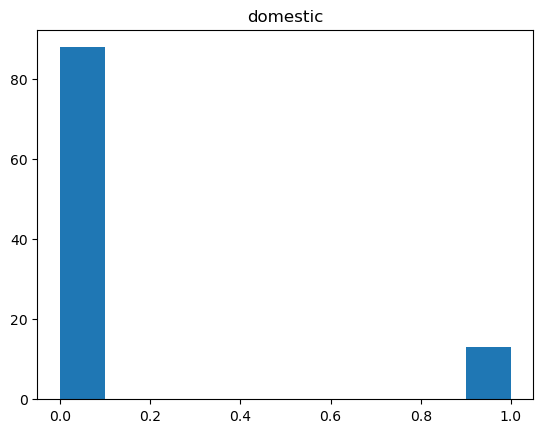

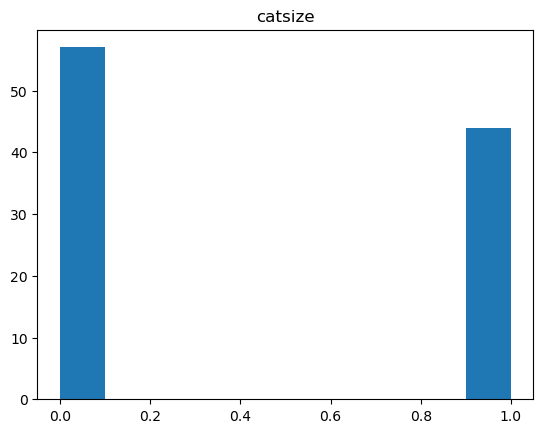

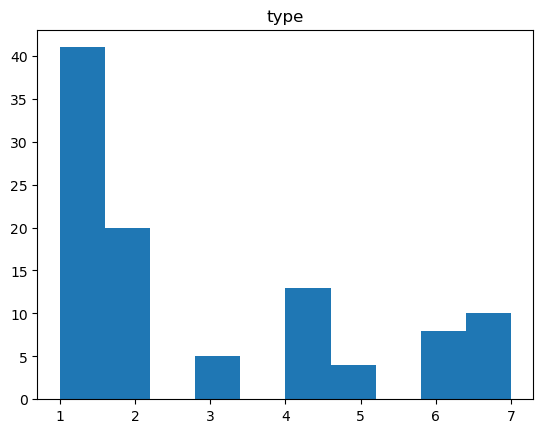

In [46]:
# Visualization.

columns = data.columns
for column in columns:
    plt.hist(data[column])
    plt.title(column)
    plt.show()

## Dividing the data  into X and Y

In [62]:
X = data.drop("type",axis=1)
X.drop('animal name',axis=1,inplace=True)

In [63]:
Y = data["type"]

In [64]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [65]:
Y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

## Split the data into train and test

In [66]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y  = train_test_split(X,Y,test_size = 0.2, random_state = 7 )

In [67]:
print("train_x",train_x.shape)
print("train_y",train_y.shape)
print("test_x",test_x.shape)
print("test_y",test_y.shape)

train_x (80, 16)
train_y (80,)
test_x (21, 16)
test_y (21,)


In [68]:
# Building the KNN model.
from sklearn.neighbors import KNeighborsClassifier

In [70]:
model = KNeighborsClassifier(n_neighbors= 5)

In [75]:
model.fit(train_x,train_y)

KNeighborsClassifier()

## Model Evaluation

In [77]:
from sklearn.metrics import classification_report

print(classification_report(train_y,model.predict(train_x)))

              precision    recall  f1-score   support

           1       0.97      0.97      0.97        34
           2       1.00      1.00      1.00        15
           3       0.67      0.40      0.50         5
           4       0.77      1.00      0.87        10
           5       1.00      0.50      0.67         2
           6       0.75      1.00      0.86         6
           7       1.00      0.75      0.86         8

    accuracy                           0.91        80
   macro avg       0.88      0.80      0.82        80
weighted avg       0.92      0.91      0.91        80



In [78]:
print(classification_report(test_y,model.predict(test_x)))

              precision    recall  f1-score   support

           1       1.00      0.86      0.92         7
           2       1.00      1.00      1.00         5
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         2
           6       0.67      1.00      0.80         2
           7       1.00      0.50      0.67         2

    accuracy                           0.90        21
   macro avg       0.90      0.89      0.87        21
weighted avg       0.93      0.90      0.90        21



## Visualizing the Decision boundries of the classifier.

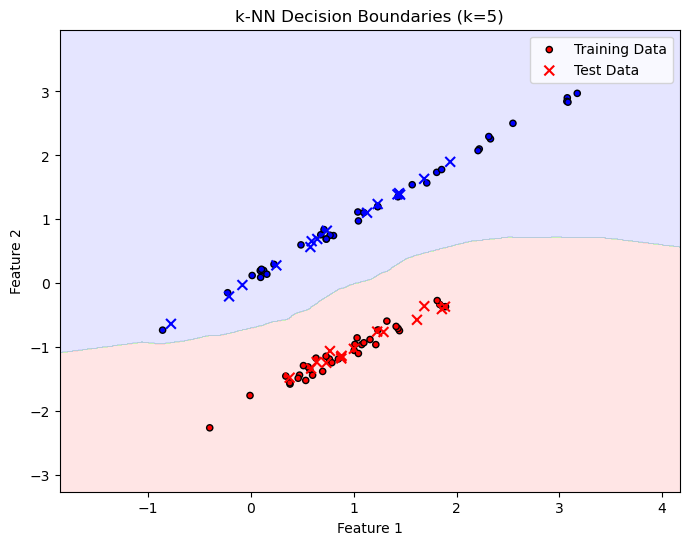

In [80]:
from sklearn.datasets import make_classification

from matplotlib.colors import ListedColormap

# Generate a synthetic 2D dataset
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_samples=100, random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Create a mesh grid for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the decision boundaries over the grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20, label='Training Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=50, marker='x', label='Test Data')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("k-NN Decision Boundaries (k=5)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


## Interview Questions:

### 1. What are the key hyperparameters in KNN?

**n_neighbors** : the number of neighbors to consider for making a prediction. htis is the most crucial hyperparameter in KNN.

**Weights**: determines how ot weight the contribution of the neighbors.

**algorithm**: the algorithm used to compute the nearest neighbors.

**metric**: the distance metric used to calculate the distance between points.

### 2. What distance metrics can be used in KNN?

1. Euclidean Distance.
2. Manhattan Distance.
3. MinKowshki Distance.
4. chebyshev distance.
5. Mahalanobis distance
6. cosine similarity.
7. jaccard distance.
